In [1]:
#imports libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.signal as sps
import scipy.fftpack as spf
import mne 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
#import database
data = pd.read_csv('samples.csv', delimiter =',')
data.head()

,'Time and date','EEG Fp1','EEG Fp2','EEG F3','EEG F4','EEG F7','EEG F8','EEG T3','EEG T4','EEG C3',...,'EEG P3','EEG P4','EEG O1','EEG O2','EEG Fz','EEG Cz','EEG Pz','EEG A2-A1','ECG ECG','EDF Annotations'
0,'hh:mm:ss.mmm dd/mm/yyyy','uV','uV','uV','uV','uV','uV','uV','uV','uV',...,'uV','uV','uV','uV','uV','uV','uV','uV','mV',''
1,'[00:00:00.000 01/01/2011]',-3.648,-3.581,-4.082,-0.237,-3.46,-1.022,-1.619,4.479,-1.958,...,1.077,7.087,4.313,10.168,-0.228,0.359,2.822,1.291,0.005,0.376
2,'[00:00:00.002 01/01/2011]',-4.236,-4.279,-4.767,-0.617,-3.709,-1.309,-0.877,5.607,-1.428,...,2.963,9.16,6.237,12.274,-0.603,4.161,5.311,0.973,0.002,0.376
3,'[00:00:00.004 01/01/2011]',-4.954,-5.02,-5.784,-1.193,-3.903,-1.524,0.172,7.056,-0.865,...,5.319,11.769,8.766,14.835,-1.163,8.862,8.367,0.579,-0.003,0.376
4,'[00:00:00.006 01/01/2011]',-5.704,-5.655,-7.08,-1.928,-4.019,-1.548,1.454,8.67,-0.37,...,7.871,14.623,11.722,17.598,-1.883,13.7,11.597,0.183,-0.01,0.376


In [3]:
pyo=30000
pio=630000
#data preprocessing of database
x=[]
i=1
while(i<=21):
    x.append(data.iloc[1:,i].values) 
    i= i+1
print(np.shape(x))
x_new = np.ravel(x)#making 21X30000 to 1X630000
for j in range(pio):#converting each element of our data file into float
     if x_new[j] == '-' or x_new[j] =='+':
         x_new[j] = 0
     else:
         x_new[j]= float(x_new[j])
print(np.shape(x_new))

(21, 30000)
(630000,)


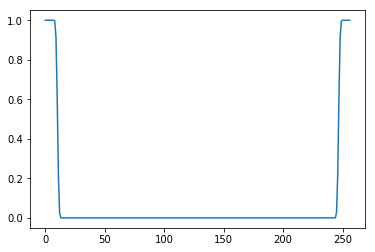

In [4]:
#preprocessing for putting a fir filter 
sample_rate = 500
#numtaps , beta = sps.kaiserord(60, 0.05)

hn = sps.firwin(numtaps = 257, cutoff = 20, window = ('kaiser', 8.856 ), fs = sample_rate)
#hn = sps.firwin(numtaps = 1211 , cutoff = 20, fs = sample_rate)
fft_hn = spf.fft(hn)

#ploting a graph of fft filter
plt.figure('hn')
plt.plot(np.absolute(fft_hn))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


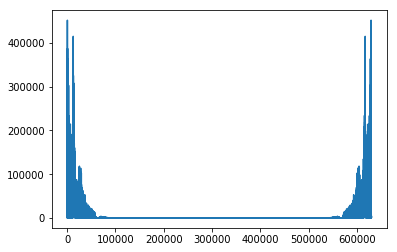

In [5]:
#Appling fir filter
yn = sps.lfilter(b=hn , a=1 , x=x_new)#yn is output signal


#ploting input frequency curve
fft_input = spf.fft(x_new)
plt.figure('input and output frequecy')
plt.plot(np.absolute(fft_input))

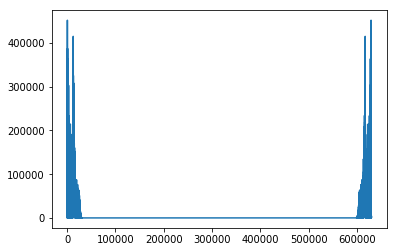

In [6]:
#ploting output frequency curve
fft_output = spf.fft(yn)#extracting output frequency from yn
plt.plot(np.absolute(fft_output))

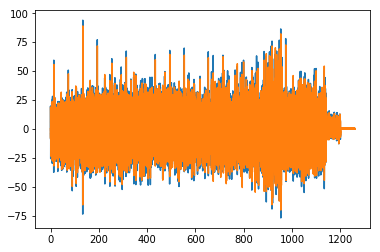

In [7]:
#ploting outputsignal curve
t= np.arange(pio)/sample_rate
#delay=((0.5*())/sample_rate)
plt.figure('output with input signal')
plt.plot(t,x_new)
plt.plot(t,yn)

In [8]:
fr=[]
for i in range(pyo):
    gr=[]
    for j in range(21):
        gr.append(yn[i+j*pyo])
    fr.append(gr)
fr = np.transpose(fr)
fr=fr*0.00003
print(np.shape(fr))
print(fr)

(21, 30000)
[[-1.95117872e-10 -4.10531524e-10 -6.01494298e-10 ...  2.54150757e-05
   6.89757422e-05  1.14114191e-04]
 [ 1.59511546e-04  2.03814089e-04  2.45688488e-04 ... -7.01908224e-05
  -2.00637429e-05  3.07480016e-05]
 [ 8.07598616e-05  1.28539454e-04  1.72766055e-04 ...  1.81795774e-04
   2.26624028e-04  2.73897519e-04]
 ...
 [ 4.60176356e-04  5.04064168e-04  5.45308968e-04 ...  2.52086931e-04
   2.58603526e-04  2.65820705e-04]
 [ 2.73344010e-04  2.80724806e-04  2.87473252e-04 ... -2.90770120e-06
  -1.66416946e-05 -3.17986103e-05]
 [-4.80508802e-05 -6.49974697e-05 -8.21772261e-05 ... -1.65323252e-06
  -1.65210882e-06 -1.64646548e-06]]


Creating RawArray with float64 data, n_channels=21, n_times=30000
    Range : 0 ... 29999 =      0.000 ...    59.998 secs
Ready.


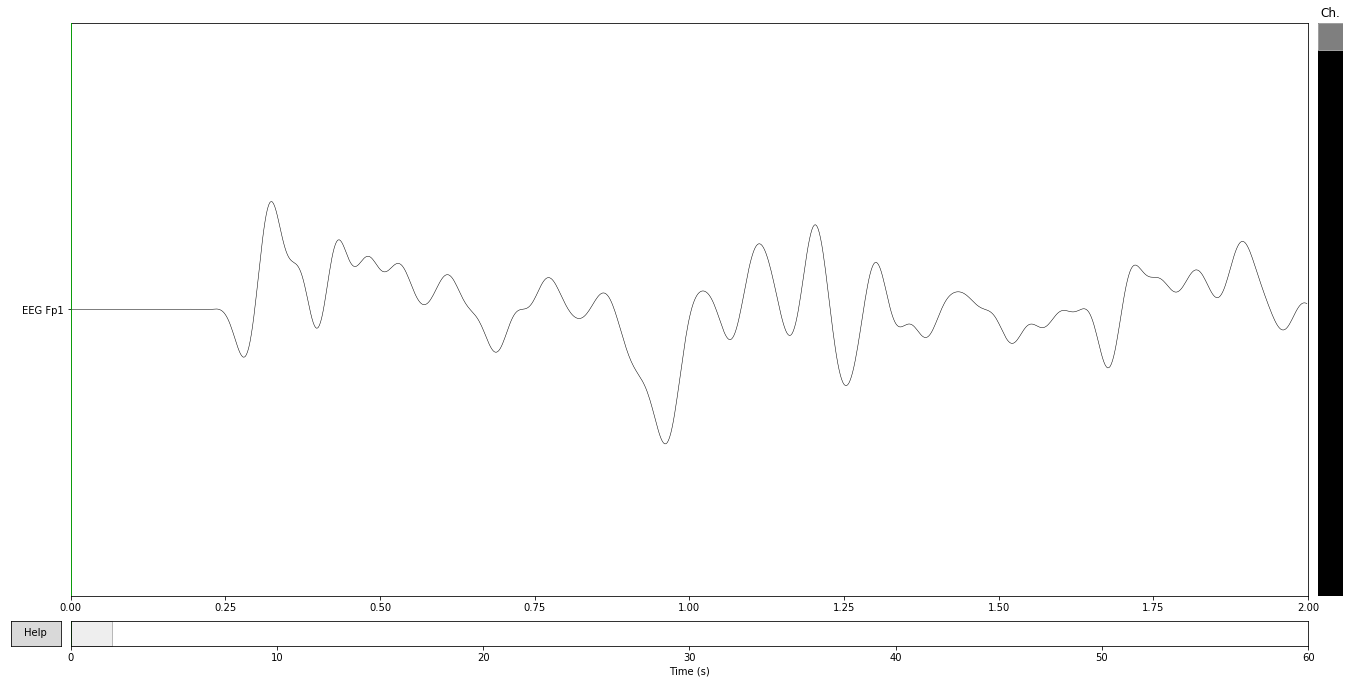

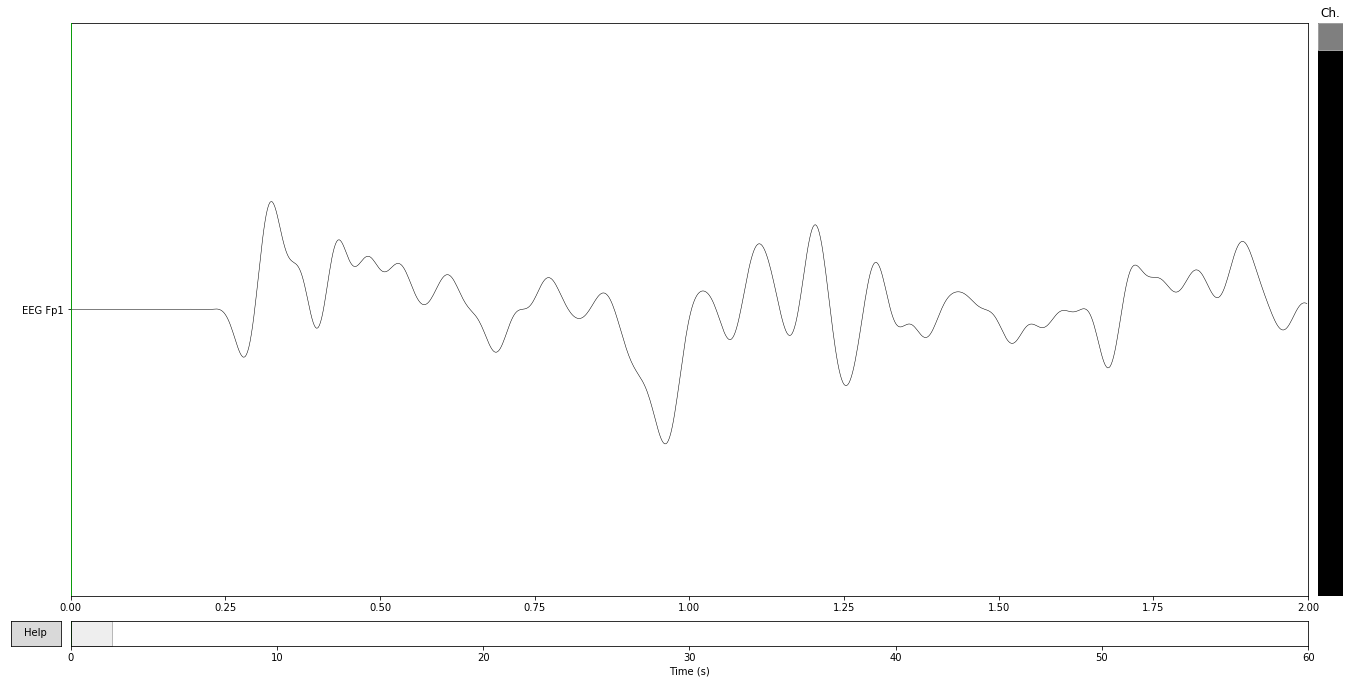

In [9]:
# Some information about the channels
ch_names = ['EEG Fp1','EEG Fp2','EEG F3','EEG F4','EEG F7',
            'EEG F8','EEG T3','EEG T4','EEG C3','EEG C4','EEG T5','EEG T6',
            'EEG P3','EEG P4','EEG O1','EEG O2','EEG Fz',
            'EEG Cz','EEG Pz','EEG A2-A1','ECG ECG']  # TODO: finish this list

# Sampling rate of the Nautilus machine
sfreq = 500  # Hz

# Create the info structure needed by MNE
info = mne.create_info(ch_names, sfreq)

# Finally, create the Raw object
raw = mne.io.RawArray(fr, info)

# Plot it!
raw.plot(duration=2.0, start=0.0, n_channels=1,
            remove_dc=False,  title='EEG During Mental Arithmetic Task')
